In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
# 1. Define dataset path
  # replace with your dataset folder path
dataset_dir = "F:\Project\Blood cell Cancer [ALL]"

<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14460\3257517751.py:3: SyntaxWarning: invalid escape sequence '\P'
  dataset_dir = "F:\Project\Blood cell Cancer [ALL]"


In [13]:
# 2. Image data generators with augmentation and validation split
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% for validation
)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)




Found 2595 images belonging to 4 classes.
Found 647 images belonging to 4 classes.


In [14]:
# 3. Build model using transfer learning (MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(*img_size, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
base_model.trainable = False

model = Sequential([
    base_model,
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [15]:
# 4. Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)


In [16]:
# 5. Train
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6589 - loss: 0.8494

82/82 ━━━━━━━━━━━━━━━━━━━━ 380s 5s/step - accuracy: 0.6605 - loss: 0.8458 - val_accuracy: 0.8532 - val_loss: 0.4235
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8941 - loss: 0.2756

82/82 ━━━━━━━━━━━━━━━━━━━━ 276s 3s/step - accuracy: 0.8943 - loss: 0.2752 - val_accuracy: 0.9258 - val_loss: 0.2660
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 23s/step - accuracy: 0.9415 - loss: 0.1764 

82/82 ━━━━━━━━━━━━━━━━━━━━ 1898s 23s/step - accuracy: 0.9415 - loss: 0.1763 - val_accuracy: 0.9320 - val_loss: 0.2157
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 218s 3s/step - accuracy: 0.9454 - loss: 0.1484 - val_accuracy: 0.9304 - val_loss: 0.2232
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9551 - loss: 0.1280

82/82 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.9551 - loss: 0.1280 - val_accuracy: 0.9382 - val_loss: 0.2006
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9584 - loss: 0.1227

82/82 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.9585 - loss: 0.1226 - val_accuracy: 0.9459 - val_loss: 0.1946
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.9578 - loss: 0.1317 - val_accuracy: 0.9459 - val_loss: 0.1412
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.9658 - loss: 0.1000 - val_accuracy: 0.9382 - val_loss: 0.1715
Epoch 9/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.9637 - loss: 0.0977 - val_accuracy: 0.9428 - val_loss: 0.1925
Epoch 10/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9689 - loss: 0.0859

82/82 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.9688 - loss: 0.0861 - val_accuracy: 0.9629 - val_loss: 0.1195
Epoch 11/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - accuracy: 0.9802 - loss: 0.0750 - val_accuracy: 0.9382 - val_loss: 0.1942
Epoch 12/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.9647 - loss: 0.0945 - val_accuracy: 0.9521 - val_loss: 0.1414
Epoch 13/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.9733 - loss: 0.0762 - val_accuracy: 0.9598 - val_loss: 0.1701
Epoch 14/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 216s 3s/step - accuracy: 0.9765 - loss: 0.0715 - val_accuracy: 0.9598 - val_loss: 0.1242
Epoch 15/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.9763 - loss: 0.0656 - val_accuracy: 0.9614 - val_loss: 0.1563


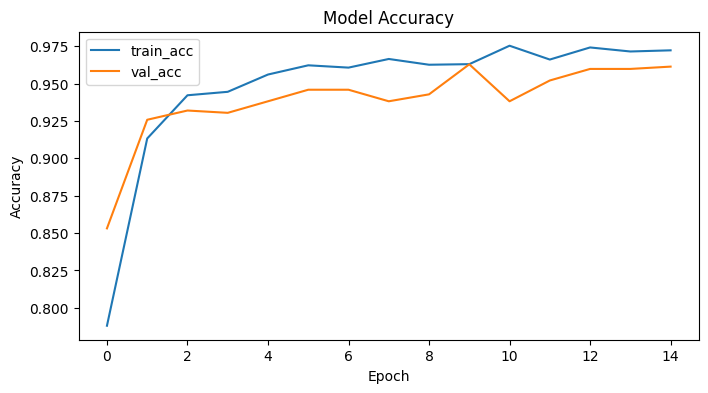

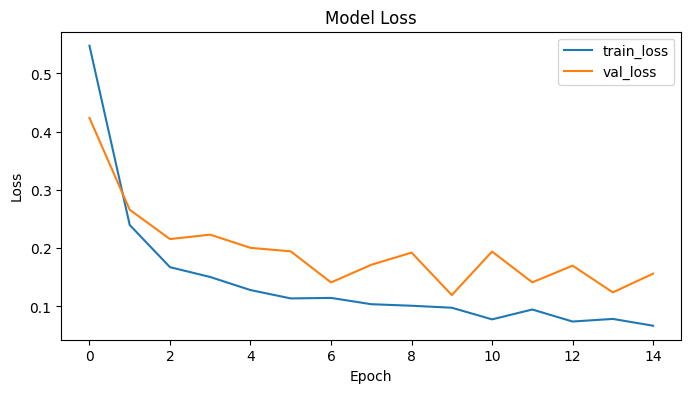

In [17]:
# 6. Plot training history
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [18]:
# 7. Evaluate on validation set
val_generator.reset()
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())



21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step


In [19]:
# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))



Classification Report:
                         precision    recall  f1-score   support

                 Benign       0.93      0.91      0.92       102
      [Malignant] Pre-B       0.99      0.95      0.97       191
      [Malignant] Pro-B       0.93      0.95      0.94       159
[Malignant] early Pre-B       0.95      0.98      0.97       195

               accuracy                           0.96       647
              macro avg       0.95      0.95      0.95       647
           weighted avg       0.96      0.96      0.96       647



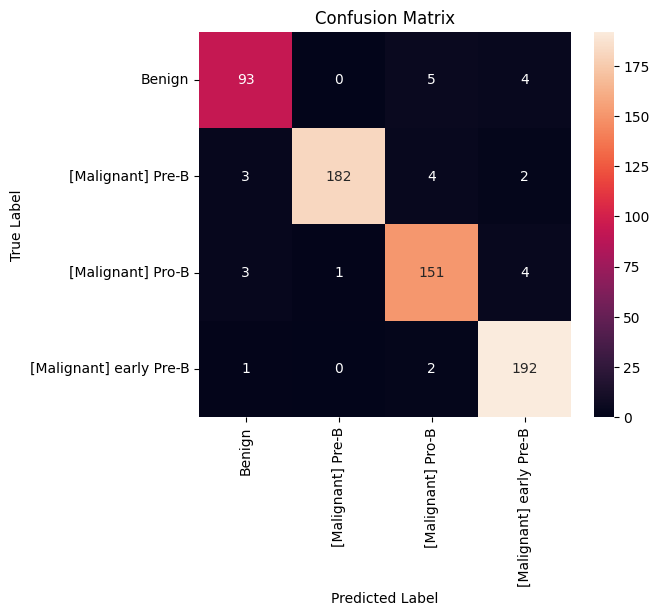

In [20]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()



In [21]:
# 8. (Optional) Fine-tune base model
base_model.trainable = True
for layer in base_model.layers[:-20]:  # freeze early layers
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

fine_history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint]
)



Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.4635 - loss: 2.2104 - val_accuracy: 0.7326 - val_loss: 1.1338
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 234s 3s/step - accuracy: 0.8338 - loss: 0.4133 - val_accuracy: 0.6522 - val_loss: 1.6414
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 235s 3s/step - accuracy: 0.9056 - loss: 0.2559 - val_accuracy: 0.7295 - val_loss: 1.1842
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 227s 3s/step - accuracy: 0.9127 - loss: 0.2268 - val_accuracy: 0.7697 - val_loss: 0.9214
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 276s 3s/step - accuracy: 0.9311 - loss: 0.1916 - val_accuracy: 0.8207 - val_loss: 0.7466
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 210s 3s/step - accuracy: 0.9343 - loss: 0.1858 - val_accuracy: 0.8269 - val_loss: 0.7599
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.9366 - loss: 0.1613 - val_accuracy: 0.8532 - val_loss: 0.6631
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.9566 - loss: 0.1232 - val_accuracy: 0.8624 - v

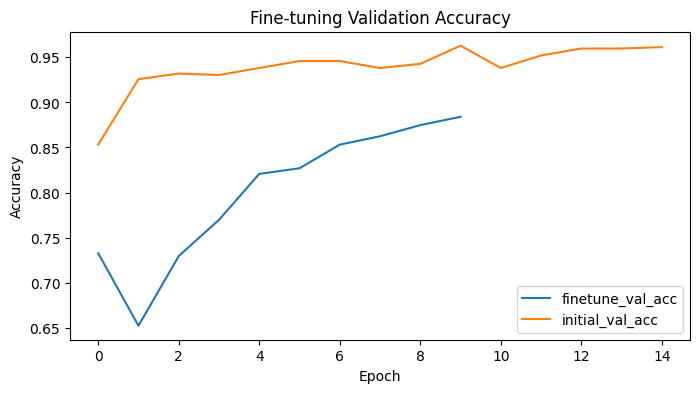

In [22]:
# Plot fine-tuning results
plt.figure(figsize=(8,4))
plt.plot(fine_history.history['val_accuracy'], label='finetune_val_acc')
plt.plot(history.history['val_accuracy'], label='initial_val_acc')
plt.title('Fine-tuning Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()